# Problem Statement
***Self Driving Car Sumulation***

In [ ]:
# ! git clone http://bitbucket.org/jadslim/german-traffic-signs

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import cv2
import keras
import random
import pickle
import numpy as np;                                          np.random.seed(0)
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
from keras.optimizers import Adam
from keras.models import Sequential
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D

In [3]:

path_pickel_Train="/content/drive/MyDrive/Colab Notebooks/Self_Project/self_driving_car_simulation_project/Traffic+Signs+Starter+Project.ipynb/german-traffic-signs/train.p"
path_pickel_Test="/content/drive/MyDrive/Colab Notebooks/Self_Project/self_driving_car_simulation_project/Traffic+Signs+Starter+Project.ipynb/german-traffic-signs/test.p"
path_pickel_valid="/content/drive/MyDrive/Colab Notebooks/Self_Project/self_driving_car_simulation_project/Traffic+Signs+Starter+Project.ipynb/german-traffic-signs/valid.p"
path_singnames="/content/drive/MyDrive/Colab Notebooks/Self_Project/self_driving_car_simulation_project/Traffic+Signs+Starter+Project.ipynb/german-traffic-signs/signnames.csv"

with open (path_pickel_Train, 'rb') as f:
    train_data = pickle.load(f)

with open (path_pickel_Test, 'rb') as f:
  test_data = pickle.load(f)

with open(path_pickel_valid, 'rb') as f:
  val_data = pickle.load(f)



In [4]:

x_train, y_train = train_data['features'], train_data['labels']

x_val, y_val = val_data['features'], val_data['labels']

x_test, y_test = test_data['features'], test_data['labels']



In [5]:

assert(x_train.shape[0] == y_train.shape[0]),"The number of images is not equal to the number of labels."

assert(x_val.shape[0] == y_val.shape[0]),"The number of images is not equal to the number of labels."

assert(x_test.shape[0] == y_test.shape[0]),"The number of images is not equal to the number of labels."


[180, 1980, 2010, 1260, 1770, 1650, 360, 1290, 1260, 1320, 1800, 1170, 1890, 1920, 690, 540, 360, 990, 1080, 180, 300, 270, 330, 450, 240, 1350, 540, 210, 480, 240, 390, 690, 210, 599, 360, 1080, 330, 180, 1860, 270, 300, 210, 210]


Text(0, 0.5, 'Number of images')

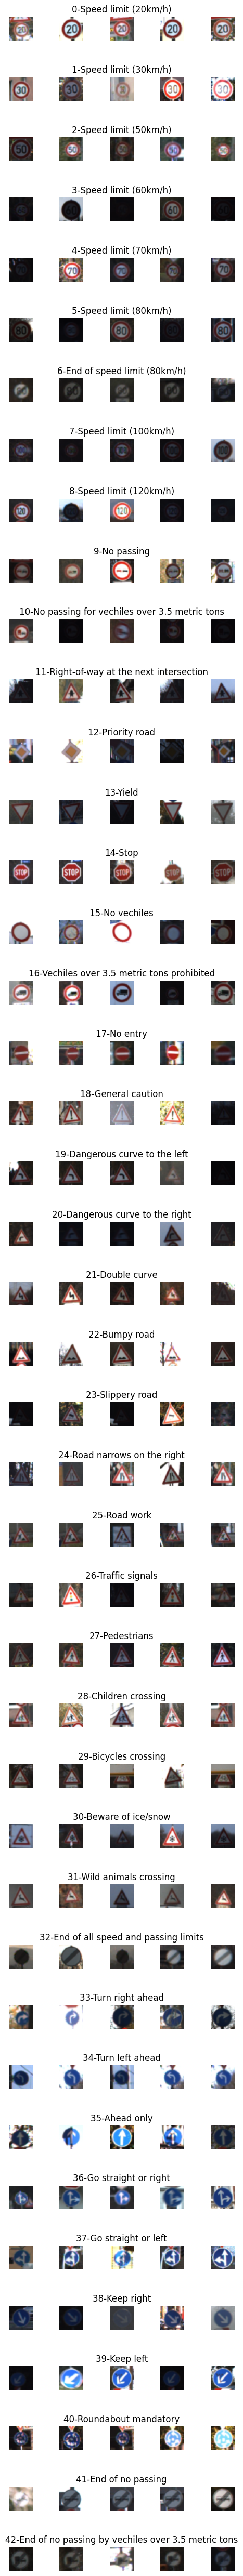

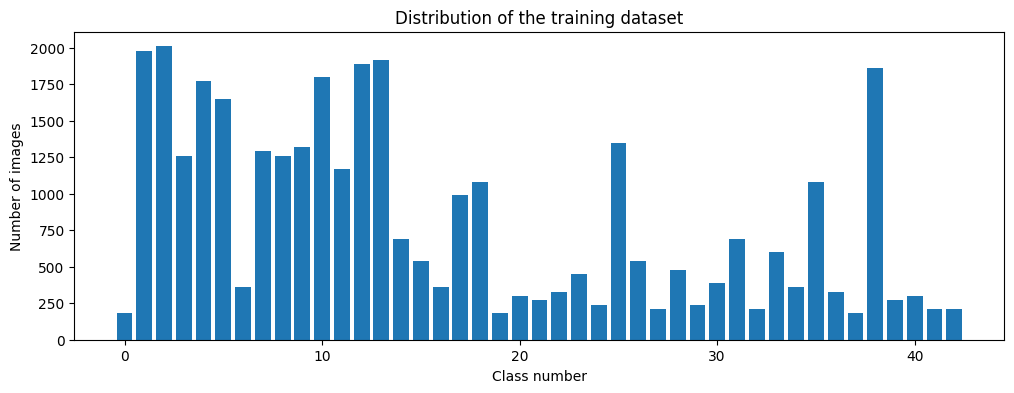

In [7]:
Df_traffic = pd.read_csv(path_singnames)
num_of_samples = []

cols = 5
num_classes = 43

fig, axs = plt.subplots(nrows=num_classes, ncols = cols, figsize=(5,50))

fig.tight_layout()

for i in range(cols):
    for j, row in Df_traffic.iterrows():
        x_selected = x_train[y_train == j]
        axs[j][i].imshow(x_selected[random.randint(0, len(x_selected - 1)), :, :], cmap=plt.get_cmap("gray"))
        axs[j][i].axis("off")
        if i == 2:
            axs[j][i].set_title(str(j)+"-"+row['SignName'])
            num_of_samples.append(len(x_selected))


print(num_of_samples)
plt.figure(figsize=(12, 4))
plt.bar(range(0, num_classes), num_of_samples)
plt.title("Distribution of the training dataset")
plt.xlabel("Class number")
plt.ylabel("Number of images")

## ImagePreprocessing

In [8]:
def grayscal(img):
    img = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
    return img

def equalizer(img):
    img = cv2.equalizeHist(img)
    return img

In [9]:
def preprocessing(img):
    img = grayscal(img)               # Grayscal
    img = equalizer(img)              # Histogram equlizer
    img = img/255                     # Normalization
    return img

In [10]:
x_train = np.array(list(map(preprocessing, x_train)))

x_val = np.array(list(map(preprocessing, x_val)))

x_test = np.array(list(map(preprocessing, x_test)))

In [11]:
x_train = x_train.reshape(34799, 32, 32, 1)

x_test = x_test.reshape(12630, 32, 32, 1)

x_val = x_val.reshape(4410, 32, 32, 1)

### Data Augmentation

In [12]:


Image_Data_gen = ImageDataGenerator(width_shift_range=0.1,
                                height_shift_range=0.1,
                                zoom_range=0.2,
                                shear_range=0.1,
                                rotation_range=10)


In [13]:
y_train = to_categorical(y_train, num_classes)

y_test = to_categorical(y_test, num_classes)

y_val = to_categorical(y_val, num_classes)

In [14]:
print(x_train.shape,y_train.shape)
print(x_test.shape,y_test.shape)
print(x_val.shape,y_val.shape)

(34799, 32, 32, 1) (34799, 43)
(12630, 32, 32, 1) (12630, 43)
(4410, 32, 32, 1) (4410, 43)


# **LeNet**

In [34]:
def leNet():
  model=Sequential()
  model.add(Conv2D(60, (5,5), input_shape=(32,32,1), activation='relu'))

  model.add(Conv2D(60, (5,5), activation='relu'))
  model.add(MaxPooling2D(pool_size=(2,2)))

  model.add(Conv2D(30,(3,3),activation= 'relu'))
  model.add(Conv2D(30,(3,3),activation= 'relu'))
  model.add(MaxPooling2D(pool_size=(2,2)))
  # model.add(Dropout(0.5))

  model.add(Flatten()) # above this the CNN and Blow this ANN

  model.add(Dense(500, activation='relu'))
  model.add(Dropout(0.5))
  model.add(Dense(num_classes, activation='softmax'))

  # compile the model
  model.compile(optimizer=Adam(learning_rate=0.001), loss='categorical_crossentropy', metrics=['accuracy'])
  return model

In [35]:
cnnLeNet=leNet()
cnnLeNet.summary()

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_7"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_23 (Conv2D)                   │ (None, 28, 28, 60)          │           1,560 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_24 (Conv2D)                   │ (None, 24, 24, 60)          │          90,060 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_14 (MaxPooling2D)      │ (None, 12, 12, 60)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_25 (Conv2D)                   │ (None, 10, 10, 30)          │          16,230 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_26 (Conv2D)                   │ (None, 8, 8, 30)            │           8,130 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_15 (MaxPooling2D)      │ (None, 4, 4, 30)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_7 (Flatten)                  │ (None, 480)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_14 (Dense)                     │ (None, 500)                 │         240,500 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_12 (Dropout)                 │ (None, 500)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_15 (Dense)                     │ (None, 43)                  │          21,543 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 378,023 (1.44 MB)

 Trainable params: 378,023 (1.44 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
history = cnnLeNet.fit(
    Image_Data_gen.flow(x_train, y_train, batch_size=50),
    epochs=10,
    validation_data=(x_val, y_val),
    shuffle=1)

Epoch 1/10


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


696/696 ━━━━━━━━━━━━━━━━━━━━ 395s 565ms/step - accuracy: 0.2753 - loss: 2.6766 - val_accuracy: 0.8887 - val_loss: 0.3751
Epoch 2/10
696/696 ━━━━━━━━━━━━━━━━━━━━ 389s 559ms/step - accuracy: 0.7979 - loss: 0.6735 - val_accuracy: 0.9639 - val_loss: 0.1169
Epoch 3/10
696/696 ━━━━━━━━━━━━━━━━━━━━ 384s 551ms/step - accuracy: 0.8856 - loss: 0.3742 - val_accuracy: 0.9744 - val_loss: 0.0814
Epoch 4/10
696/696 ━━━━━━━━━━━━━━━━━━━━ 440s 548ms/step - accuracy: 0.9144 - loss: 0.2784 - val_accuracy: 0.9832 - val_loss: 0.0514
Epoch 5/10
696/696 ━━━━━━━━━━━━━━━━━━━━ 386s 554ms/step - accuracy: 0.9339 - loss: 0.2152 - val_accuracy: 0.9859 - val_loss: 0.0489
Epoch 6/10
696/696 ━━━━━━━━━━━━━━━━━━━━ 378s 542ms/step - accuracy: 0.9402 - loss: 0.1926 - val_accuracy: 0.9875 - val_loss: 0.0414
Epoch 7/10
696/696 ━━━━━━━━━━━━━━━━━━━━ 387s 550ms/step - accuracy: 0.9507 - loss: 0.1579 - val_accuracy: 0.9878 - val_loss: 0.0459
Epoch 8/10
696/696 ━━━━━━━━━━━━━━━━━━━━ 377s 541ms/step - accuracy: 0.9534 - loss: 0.15

# Image Resource
https://c8.alamy.com/comp/G667W0/road-sign-speed-limit-30-kmh-zone-passau-bavaria-germany-G667W0.jpg

https://c8.alamy.com/comp/A0RX23/cars-and-automobiles-must-turn-left-ahead-sign-A0RX23.jpg

https://previews.123rf.com/images/bwylezich/bwylezich1608/bwylezich160800375/64914157-german-road-sign-slippery-road.jpg

https://previews.123rf.com/images/pejo/pejo0907/pejo090700003/5155701-german-traffic-sign-no-205-give-way.jpg

https://c8.alamy.com/comp/J2MRAJ/german-road-sign-bicycles-crossing-J2MRAJ.jpg



## Fatch Image from web


In [ ]:
#fetch image

import requests
from PIL import Image
url = 'https://c8.alamy.com/comp/J2MRAJ/german-road-sign-bicycles-crossing-J2MRAJ.jpg'
r = requests.get(url, stream=True)
img = Image.open(r.raw)
plt.imshow(img, cmap=plt.get_cmap('gray'))


#Preprocess image

img = np.asarray(img)
img = cv2.resize(img, (32, 32))
img = preprocessing(img)
plt.imshow(img, cmap = plt.get_cmap('gray'))
print(img.shape)

#Reshape reshape

img = img.reshape(1, 32, 32, 1)

#Test image
print("predicted sign: "+ str(cnnLeNet.predict_classes(img)))


# Next